# 아파트 실거래가 예측

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')
park_df = pd.read_csv('./input/park.csv')
center_df = pd.read_csv('./input/day_care_center.csv')

In [3]:
train_df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


- exclusive_use_area: 전용면적(한 세대만 독점적으로 사용하는 공간)
- transaction_real_price: 실거래가(단위:만원, 타겟 값, train만 존재)
- transaction_year_month: 거래년월
- transaction_date: 거래일
- floor: 층 

In [4]:
train_df.describe() 

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06
mean,6.091530e+05,6.299685e+03,7.816549e+01,1.998297e+03,2.012984e+05,9.343291e+00,3.822769e+04
std,3.526198e+05,3.581169e+03,2.915113e+01,8.941347e+00,2.905732e+02,6.606500e+00,3.104898e+04
min,0.000000e+00,0.000000e+00,9.260000e+00,1.961000e+03,2.008010e+05,-4.000000e+00,1.000000e+02
25%,3.041380e+05,3.345000e+03,5.976000e+01,1.993000e+03,2.010100e+05,4.000000e+00,1.900000e+04
50%,6.082760e+05,5.964000e+03,8.241000e+01,1.999000e+03,2.013120e+05,8.000000e+00,3.090000e+04
75%,9.124140e+05,9.436000e+03,8.497000e+01,2.005000e+03,2.015110e+05,1.300000e+01,4.700000e+04
max,1.234827e+06,1.265800e+04,4.243200e+02,2.017000e+03,2.017110e+05,8.000000e+01,8.200000e+05


In [5]:
train_df.loc[train_df['floor']<=0]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
1656,1656,3876,서울특별시,구기동,95-1,렉스팰리스,구기동 95-1 렉스팰리스,140.040,2005,201109,1~10,-1,39000
2010,2010,3876,서울특별시,구기동,95-1,렉스팰리스,구기동 95-1 렉스팰리스,151.620,2005,201207,11~20,-1,40000
2220,2220,2966,서울특별시,숭인동,820-1,도시그린빌라트18차,숭인동 820-1 도시그린빌라트18차,59.760,1997,201302,11~20,-1,15800
2938,2938,1,서울특별시,명륜3가,1-102,(1-102),명륜3가 1-102 (1-102),69.540,1997,201405,1~10,-1,17000
5071,5071,8643,서울특별시,신당동,432-2013,우석,신당동 432-2013 우석,59.990,2001,200801,11~20,-1,17000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095417,1095753,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,212.524,2011,201705,21~31,-1,480000
1128345,1132486,9125,서울특별시,진관동,84,은평뉴타운 우물골(두산위브7단지),진관동 84 은평뉴타운 우물골(두산위브7단지),134.480,2010,201704,1~10,-1,74000
1129887,1134281,9125,서울특별시,진관동,84,은평뉴타운 우물골(두산위브7단지),진관동 84 은평뉴타운 우물골(두산위브7단지),134.510,2010,201711,11~20,-3,70500
1145606,1152790,10171,서울특별시,천왕동,281,천왕연지타운2단지,천왕동 281 천왕연지타운2단지,84.720,2014,201702,1~10,-1,48500


In [6]:
train_df.loc[train_df['transaction_real_price']==820000]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
23603,23603,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,244.749,2011,201612,21~31,3,820000


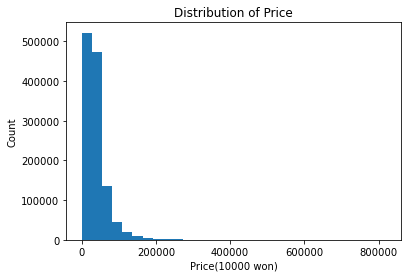

In [7]:
# train price
plt.figure()
plt.hist(train_df['transaction_real_price'], bins=30)
plt.xlabel('Price(10000 won)')
plt.ylabel('Count')
plt.title('Distribution of Price')
plt.show()

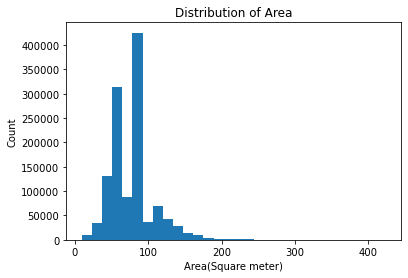

In [8]:
# train area
plt.figure()
plt.hist(train_df['exclusive_use_area'], bins=30)
plt.xlabel('Area(Square meter)')
plt.ylabel('Count')
plt.title('Distribution of Area')
plt.show()

In [45]:
under_floor = train_df.loc[train_df['floor']<=0]
under_floor.shape

(168, 13)

In [49]:
under_floor[['floor', 'transaction_real_price']].corr()

,floor,transaction_real_price
floor,1.000000,-0.126958
transaction_real_price,-0.126958,1.000000


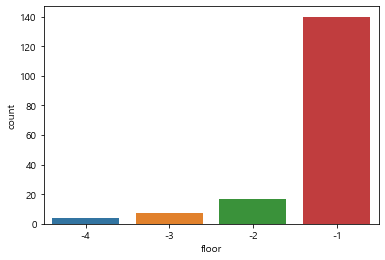

In [44]:
plt.figure()
sns.countplot(under_floor['floor'])
plt.title('')
plt.show()

In [9]:
test_df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21


In [10]:
test_df.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor
count,5.463000e+03,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000
mean,1.167126e+06,6287.570932,79.495250,2000.431082,201710.228446,8.266886
std,4.075365e+04,3624.756304,32.935434,9.982040,2.798195,6.082475
min,1.092791e+06,12.000000,10.321500,1961.000000,201701.000000,-1.000000
25%,1.134296e+06,3278.000000,59.760000,1995.000000,201709.000000,4.000000
50%,1.167937e+06,6091.000000,81.720000,2002.000000,201712.000000,7.000000
75%,1.202560e+06,9416.500000,84.970000,2007.000000,201712.000000,11.000000
max,1.234930e+06,12652.000000,273.860000,2017.000000,201712.000000,55.000000


In [11]:
test_df.isnull().any()

transaction_id            False
apartment_id              False
city                      False
dong                      False
jibun                     False
apt                       False
addr_kr                   False
exclusive_use_area        False
year_of_completion        False
transaction_year_month    False
transaction_date          False
floor                     False
dtype: bool

In [12]:
park_df.head()

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


In [13]:
park_df.iloc[:,6:11] = park_df.iloc[:,6:11].notnull().astype(int)
park_df

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,0,0,0,0,0,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,0,0,0,0,0,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,0,0,0,0,0,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,0,0,0,0,0,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,0,0,0,0,0,1970.0,2018-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,서울특별시,구로구,천왕동,이펜시아어린이공원,어린이공원,1500.0,0,1,0,0,0,2006.0,2019-02-25
1355,서울특별시,구로구,천왕동,개명소공원,소공원,5415.0,0,0,0,0,0,2006.0,2019-02-25
1356,서울특별시,구로구,천왕동,봉화대근린공원,근린공원,60975.0,0,0,0,0,0,2006.0,2019-02-25
1357,서울특별시,구로구,항동,푸른수목원,근린공원,100809.0,0,0,0,0,0,2005.0,2019-02-25


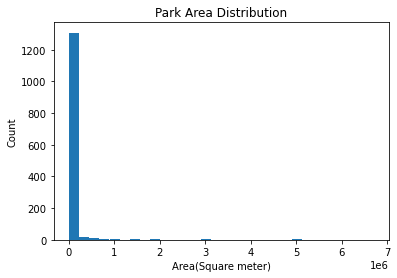

In [14]:
plt.figure()
plt.hist(park_df['park_area'], bins=30)
plt.xlabel('Area(Square meter)')
plt.ylabel('Count')
plt.title('Park Area Distribution')
plt.show()

Text(0.5, 1.0, 'Facility Corr. Heatmap')

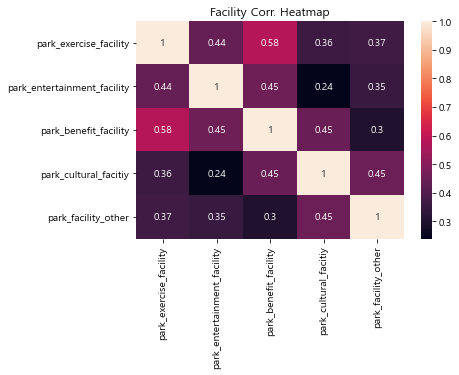

In [32]:
facility = park_df.iloc[:,6:11]
plt.figure()
sns.heatmap(facility.corr(), annot=True)
plt.title('Facility Corr. Heatmap')

In [15]:
center_df.head()

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


In [16]:
center_df.describe()

,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
count,7551.000000,7326.000000,4352.000000,3626.000000,5280.000000
mean,44.396636,9.013514,4.528033,0.398235,6.676136
std,37.022079,5.809909,2.075709,0.730602,4.482168
min,5.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,6.000000,3.000000,0.000000,4.000000
50%,29.000000,7.000000,4.000000,0.000000,5.000000
75%,60.000000,11.000000,5.000000,1.000000,8.000000
max,489.000000,98.000000,22.000000,16.000000,53.000000


In [17]:
center_df.isna().sum()

city                       0
gu                         0
day_care_name              0
day_care_type              0
day_care_baby_num          0
teacher_num              225
nursing_room_num        3199
playground_num          3925
CCTV_num                2271
is_commuting_vehicle     496
reference_date             0
dtype: int64

In [18]:
center_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  7551 non-null   object 
 1   gu                    7551 non-null   object 
 2   day_care_name         7551 non-null   object 
 3   day_care_type         7551 non-null   object 
 4   day_care_baby_num     7551 non-null   int64  
 5   teacher_num           7326 non-null   float64
 6   nursing_room_num      4352 non-null   float64
 7   playground_num        3626 non-null   float64
 8   CCTV_num              5280 non-null   float64
 9   is_commuting_vehicle  7055 non-null   object 
 10  reference_date        7551 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 649.0+ KB


In [19]:
center_df['is_commuting_vehicle'].value_counts()

N    4102
Y    2446
      401
y      88
n      18
Name: is_commuting_vehicle, dtype: int64

In [20]:
center_df.replace('y','Y',inplace=True)
center_df.replace('n','N',inplace=True)

Text(0.5, 1.0, 'Day Care Type Count Plot')

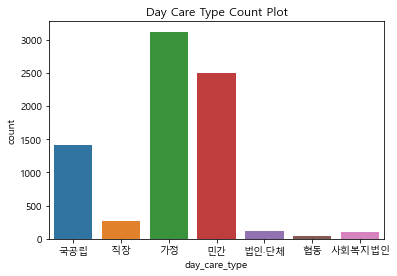

In [52]:
plt.figure()
sns.countplot(center_df['day_care_type'])
plt.title('Day Care Type Count Plot')

In [58]:
pd.DataFrame(center_df.groupby('day_care_type')['day_care_baby_num'].mean()).rename(columns={'day_care_baby_num': 'mean_baby_num'})

,mean_baby_num
day_care_type,
가정,18.394551
국공립,64.024858
민간,60.483949
법인·단체,64.575221
사회복지법인,85.392523
직장,71.334559
협동,29.179487


Text(0.5, 1.0, 'Commuting Vehicle Count Plot')

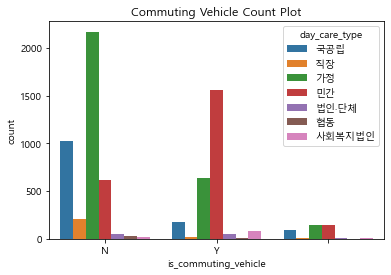

In [21]:
plt.figure()
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.countplot(center_df['is_commuting_vehicle'], hue='day_care_type', data=center_df)
plt.title('Commuting Vehicle Count Plot')

Text(0.5, 0, 'Number of Baby')

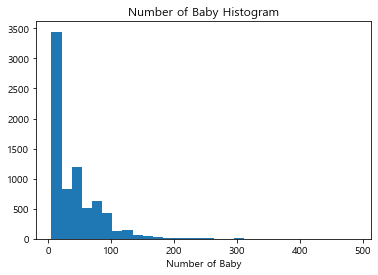

In [66]:
plt.figure()
plt.hist(center_df['day_care_baby_num'], bins=30)
plt.title('Number of Baby Histogram')
plt.xlabel('Number of Baby')

In [70]:
cctv_baby = center_df.groupby('CCTV_num')['day_care_baby_num'].mean()  
cctv_baby

CCTV_num
0.0      26.200000
1.0      22.833333
2.0      25.739130
3.0      18.270335
4.0      22.315408
5.0      31.706468
6.0      43.994764
7.0      52.978261
8.0      57.987234
9.0      71.549383
10.0     73.013072
11.0     76.471545
12.0     82.456522
13.0     80.691358
14.0     89.188406
15.0     86.791045
16.0     97.120482
17.0    128.714286
18.0    110.647059
19.0    120.416667
20.0    137.894737
21.0    123.000000
22.0    134.000000
23.0    123.750000
24.0    161.647059
25.0    175.600000
26.0    177.750000
27.0    200.000000
28.0    140.750000
29.0    153.000000
31.0     94.000000
32.0    165.222222
33.0    200.000000
36.0     88.333333
39.0    195.000000
40.0    280.000000
41.0    200.000000
53.0    222.000000
Name: day_care_baby_num, dtype: float64

Text(0.5, 0, 'Number of CCTV')

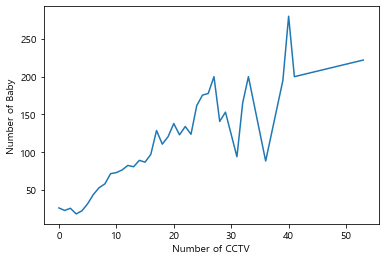

In [95]:
plt.figure()
plt.plot(cctv_baby)
plt.ylabel('Number of Baby')
plt.xlabel('Number of CCTV')

In [91]:
model = smf.ols(formula = 'day_care_baby_num ~ CCTV_num', data = center_df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      day_care_baby_num   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     6652.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:31:40   Log-Likelihood:                -24430.
No. Observations:                5280   AIC:                         4.886e+04
Df Residuals:                    5278   BIC:                         4.888e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2859      0.611      3.743      0.000       1.089       3.483
CCTV_num       6.1941      0.076     81.561      0.000       6.045       6.343
==============================================================================
Omnibus:                     2679.170   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58677.008
Skew:                           1.935   Prob(JB):                         0.00
Kurtosis:                      18.866   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

국공립과 직장, 가정, 협동,의 경우 N이 많고 민간은 Y가 많으므로 해당 분류에 맞게 결측치를 채우고
나머지 분류는 일반적으로 N이 많으로 N으로 채운다

In [22]:
center_df[['is_commuting_vehicle', 'day_care_baby_num']]

,is_commuting_vehicle,day_care_baby_num
0,N,70
1,N,88
2,N,90
3,N,18
4,N,93
...,...,...
7546,Y,46
7547,Y,19
7548,Y,92
7549,Y,43


In [23]:
center_df['day_care_type'].unique()

array(['국공립', '직장', '가정', '민간', '법인·단체', '협동', '사회복지법인'], dtype=object)

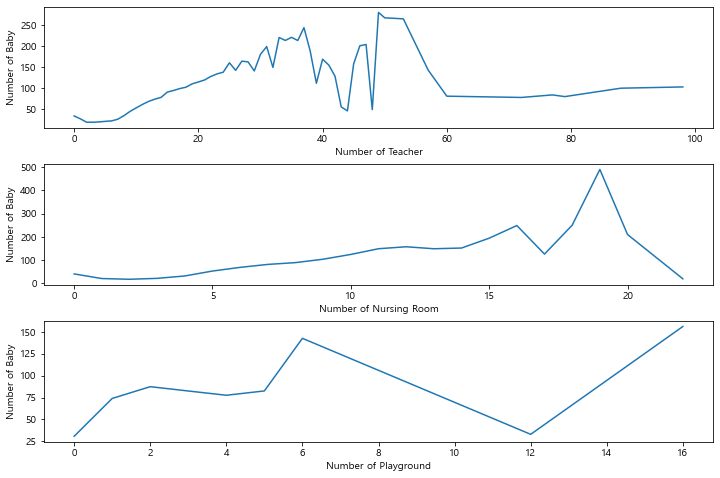

In [123]:
plt.subplots(1,3, figsize=(12,8))

ax1 = plt.subplot(311)
ax1.plot(teacher_baby)
plt.ylabel('Number of Baby')
plt.xlabel('Number of Teacher')

ax2 = plt.subplot(312)
ax2.plot(nursing_baby)
plt.ylabel('Number of Baby')
plt.xlabel('Number of Nursing Room')

ax3 = plt.subplot(313)
ax3.plot(ground_baby)
plt.ylabel('Number of Baby')
plt.xlabel('Number of Playground')

plt.subplots_adjust(hspace=0.3)
plt.show()


In [113]:
teacher_baby = center_df.groupby('teacher_num')['day_care_baby_num'].mean()
nursing_baby = center_df.groupby('nursing_room_num')['day_care_baby_num'].mean()
ground_baby = center_df.groupby('playground_num')['day_care_baby_num'].mean()

In [124]:
center_df

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31
...,...,...,...,...,...,...,...,...,...,...,...
7546,부산광역시,금정구,해바라기어린이집,민간,46,13.0,NaN,NaN,NaN,Y,2019-01-21
7547,부산광역시,금정구,해수어린이집,가정,19,6.0,NaN,NaN,NaN,Y,2019-01-21
7548,부산광역시,금정구,행복한그림동산어린이집,민간,92,16.0,NaN,NaN,NaN,Y,2019-01-21
7549,부산광역시,금정구,행복한어린이집,민간,43,12.0,NaN,NaN,NaN,Y,2019-01-21
